# Assignment 2(due on 11/08)

## Student:黄丕柱（12332298），Gtihub：HuangPizhu
## 批改人：张鹏


## 得分：52/50

### 1 Significant earthquakes since 2150 B.C.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Sig_Eqs.tsv', sep='\t')
df = df.drop('Search Parameters',axis=1)
df = df.reset_index(drop=True)

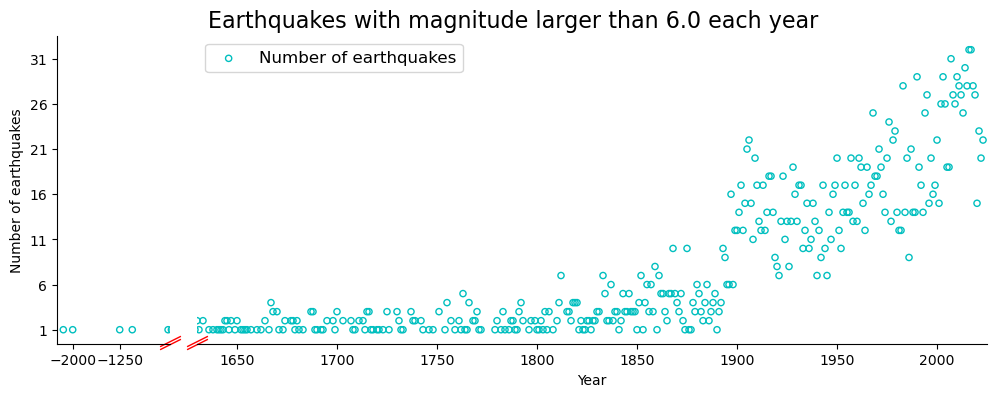

In [4]:
Total_eq_peryear = df[df['Mag'] > 6.0].groupby('Year').size()
Total_eq_peryear = Total_eq_peryear.dropna()

x,y = Total_eq_peryear.index, Total_eq_peryear.values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [1, 7]})

# Use Seaborn to create the plots
ax1.scatter(x, y,c='none',marker='o',edgecolors='c',s=20)
ax2.scatter(x, y,c='none',marker='o',edgecolors='c',s=20)  

# Set limits for the scatter plot
ax1.set_xlim(-2250.0, -450.0)
ax1.set_yticks(range(1,36,5))
ax2.set_xlim(1630, 2025)

# Hide spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Set the scatter plot limits for x-values
ax1.set_xticks([-2000, -1250])
ax2.set_xlabel("Year")
ax1.set_ylabel('Number of earthquakes')
#ax1.tick_params(axis='x', rotation=45)
ax2.set_xticks(range(1650, 2050, 50))
ax2.yaxis.set_ticks([])
d = 0.5 
# Draw markers at the break
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle='none', color='r', mec='r', mew=1, clip_on=False)
ax1.plot([1, 1], [0, 0.01],transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 0.01],transform=ax2.transAxes, **kwargs)

plt.title('Earthquakes with magnitude larger than 6.0 each year',fontsize=16,x=0.4,y=1)
plt.subplots_adjust(wspace=0.06)
plt.legend(['Number of earthquakes'],fontsize=12)
plt.show()

In [5]:
def CountEq_LargestEq(df):
    df1 = df.groupby('Country').size().reset_index().set_index('Country')
    df2 = df.dropna(axis=0, subset=['Mag'])
    df2 = df2.groupby('Country').apply(lambda x: x[x['Mag'] == x['Mag'].max()])
    df3 = pd.merge(df2, df1, how='left', left_index=True, right_index=True)

    def convert_value(value):
        if not pd.isna(value):
            return str(int(value))
        else:
            return ''

    df3[['Dy', 'Mo', 'Year']] = df3[['Dy', 'Mo', 'Year']].applymap(convert_value).astype(str)

    def format_date(row):
        if row['Mo'] and row['Dy']:
            date_parts = [row['Year'], row['Mo'], row['Dy']]
            return '/'.join(date_parts)
        else:
            return row['Year']

    df3['Date'] = df3.apply(format_date, axis=1)
    df3.rename(columns={'Mag': 'MaxMag', 0: 'NumEq'}, inplace=True)
    df3.sort_values('NumEq', ascending=False, inplace=True)
    df3 = df3.reset_index(drop=True)
    return df3[['Country', 'NumEq', 'MaxMag', 'Date']]
CountEq_LargestEq(df)

,Country,NumEq,MaxMag,Date
0,CHINA,620,8.5,1668/7/25
1,JAPAN,414,9.1,2011/3/11
2,INDONESIA,411,9.1,2004/12/26
3,IRAN,384,7.9,856/12/22
4,TURKEY,335,7.8,1939/12/26
...,...,...,...,...
164,PALAU,1,7.6,1914/10/23
165,NORWAY,1,5.8,1819/8/31
166,KIRIBATI,1,7.6,1905/6/30
167,MADAGASCAR,1,5.5,2017/1/11


### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容和详细的结果的分析，也针对问题给出文字分析.绘图仔细好看。


### 得分：26/25
### --------------------------------------------------------------------------------------------

###  2. Wind speed in Shenzhen during the past 10 years

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

font = font_manager.FontProperties(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

df = pd.read_csv('2281305.csv')
df = df.reset_index(drop=True)
df = df[['DATE','WND']]

/tmp/ipykernel_428753/2759201910.py:10: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2281305.csv')


In [7]:
df['v'] = df['WND'].str.split(',').str[3].astype(int)
df.drop(columns=['WND'],inplace=True)

In [8]:
df = df[df['v'] != 9999]
df['v'] = df['v'].replace(9999,np.nan)
df['v']=df['v'].interpolate()/10

df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')

mw = df.resample('M').mean()

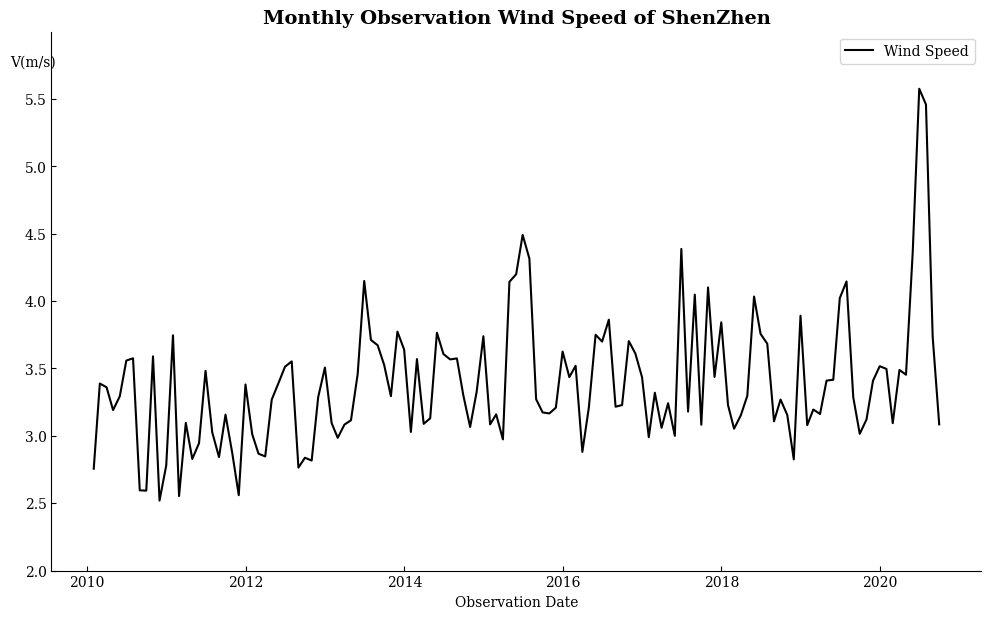

In [9]:
y = mw['v']
x = mw.index
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x,y,color='black')
ax.set_ylabel('V(m/s)',fontsize=10,rotation = 0)
ax.set_xlabel('Observation Date',fontsize=10)
ax.yaxis.set_label_coords(-0.02, 0.93)
ax.set_ylim(2, 6)
ax.set_yticks(np.arange(2, 6,0.5))
ax.set_title('Monthly Observation Wind Speed of ShenZhen',fontsize=14,fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(direction='in')
plt.legend(['Wind Speed'])
plt.show()

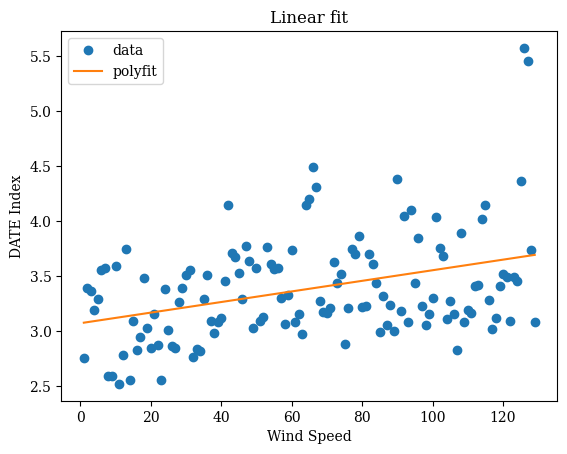

In [10]:
#polyfit mw
y=mw['v']
x= range(1,len(y)+1)
poly = np.polyfit(x,y,deg=1)
z = np.polyval(poly, x)
plt.xlabel('Wind Speed')
plt.ylabel('DATE Index')
plt.plot(x, y, 'o')
plt.plot(x, z)
plt.legend(['data', 'polyfit'])
plt.title('Linear fit')
plt.show()

### 第二题报告代码运行正常，可以输出正确结果。报告中展现了代码和结果，有对总体趋势的描述。使用了线性拟合分析变化趋势。

### 得分11/10
### ---------------------------------------------------------------------------------------------

###  3. Explore a data set

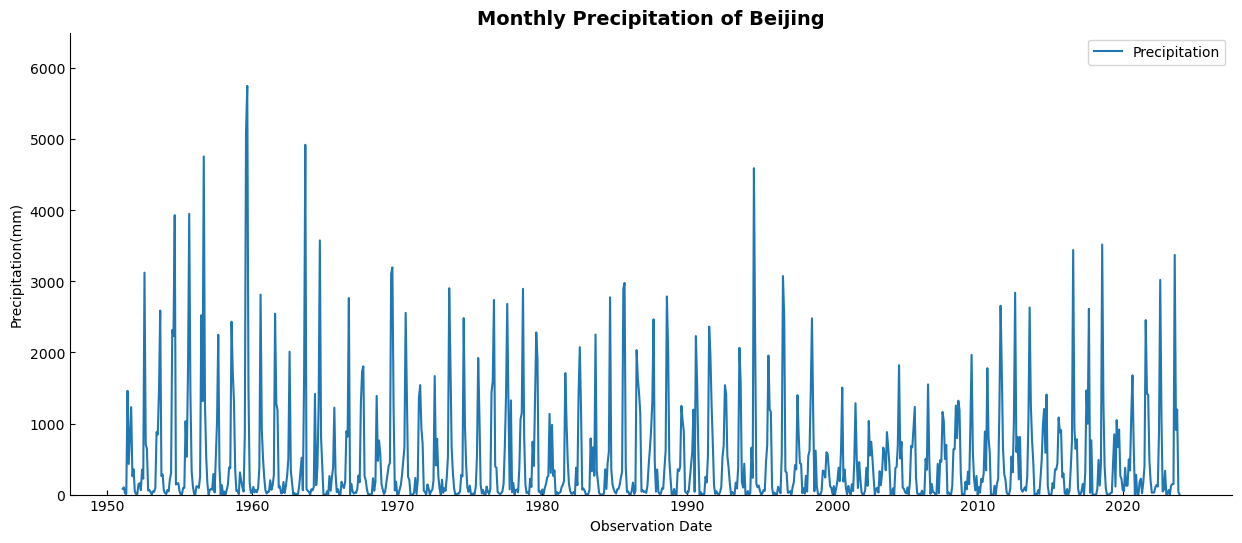

In [1]:
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('CHM00054511.csv')
df = df[['DATE','PRCP']]
df = df.fillna(0)
df['DATE'] = pd.to_datetime(df['DATE'])
# 将日期列设置为索引
df = df.set_index('DATE')
# 使用resample方法将日降水数据转换为月降水数据，并计算每个月的总降水量
mp = df.resample('M').sum()

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(mp)
ax.set_ylabel('Precipitation(mm)',fontsize=10)
ax.set_xlabel('Observation Date',fontsize=10)
#ax.yaxis.set_label_coords(-0.02, 0.93)
ax.set_ylim(0, 6500)
ax.set_yticks(range(0, 6100,1000))
ax.set_title('Monthly Precipitation of Beijing',fontsize=14,fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(direction='in')
plt.legend(['Precipitation'])
plt.show()

In [3]:
data = mp['PRCP']
data.describe()

count     875.000000
mean      494.600000
std       778.476172
min         0.000000
25%        36.000000
50%       156.000000
75%       599.500000
max      5750.000000
Name: PRCP, dtype: float64

In [8]:
mp

,PRCP,Month
DATE,,
1951-01-31,82.0,1
1951-02-28,102.0,2
1951-03-31,14.0,3
1951-04-30,9.0,4
1951-05-31,1459.0,5
...,...,...
2023-07-31,3372.0,7
2023-08-31,909.0,8
2023-09-30,1196.0,9


In [9]:
monthly_means = mp.groupby('Month')['PRCP'].mean().sort_index()
monthly_variances = mp.groupby('Month')['PRCP'].var().sort_index()
monthly_std_devs = mp.groupby('Month')['PRCP'].std().sort_index()
monthly_min_values = mp.groupby('Month')['PRCP'].min().sort_index()
monthly_max_values = mp.groupby('Month')['PRCP'].max().sort_index()

summary_df = pd.DataFrame(index=range(1, 13))
# 将统计结果存储到新的DataFrame中
summary_df['Mean'] = monthly_means
summary_df['Variance'] = monthly_variances
summary_df['Standard Deviation'] = monthly_std_devs
summary_df['Min Value'] = monthly_min_values
summary_df['Max Value'] = monthly_max_values

# 显示新的DataFrame
summary_df

,Mean,Variance,Standard Deviation,Min Value,Max Value
1,25.095890,1.689532e+03,41.103921,0.0,210.0
2,65.082192,6.004771e+03,77.490457,0.0,376.0
3,89.863014,8.128731e+03,90.159475,0.0,434.0
4,218.109589,5.346454e+04,231.224011,0.0,1416.0
5,346.712329,7.550471e+04,274.781200,18.0,1459.0
6,739.191781,2.948842e+05,543.032398,40.0,2523.0
7,1854.821918,9.801124e+05,990.006262,265.0,5111.0
8,1654.561644,1.266232e+06,1125.269930,340.0,5750.0
9,569.054795,1.688703e+05,410.938286,6.0,1490.0
10,244.369863,5.548813e+04,235.559176,0.0,1325.0


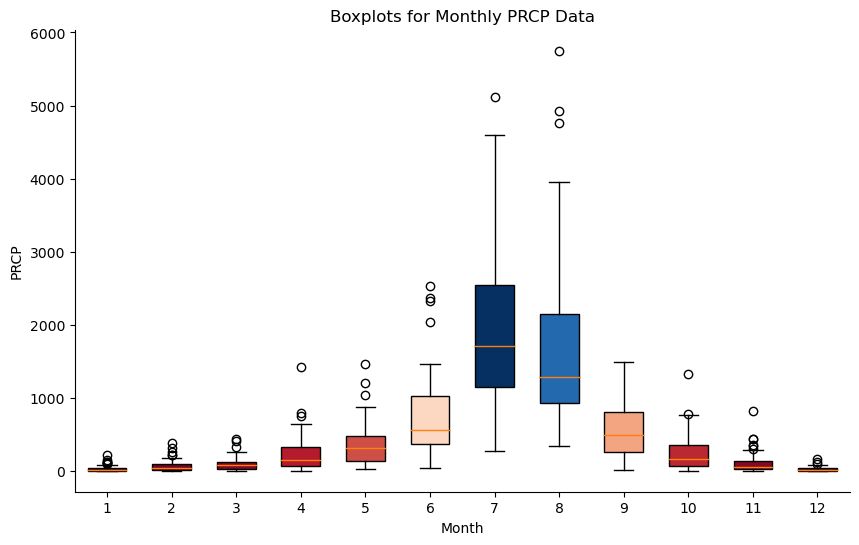

In [6]:
mp.index = pd.to_datetime(mp.index)
# 创建一个新列，表示每个日期所属的月份
mp['Month'] = mp.index.month
# 计算每个月份的平均值
monthly_means = mp.groupby('Month')['PRCP'].mean().sort_index()
# 创建一个色阶
cmap = plt.get_cmap('RdBu')  # 选择色阶，可以根据需要更改
# 映射每个月份的平均值到色阶的颜色
colors = [cmap((value - monthly_means.min()) / (monthly_means.max() - monthly_means.min())) for value in monthly_means]
# 创建一个图来绘制所有月份的横向箱线图，设置箱体的填充颜色
plt.figure(figsize=(10, 6))
plt.title('Boxplots for Monthly PRCP Data')
# 使用循环绘制每个月份的横向箱线图，并设置箱体的填充颜色
months = monthly_means.index
boxplot_data = []
for month in range(1, 13):
    data_for_month = mp[mp['Month'] == month]['PRCP']
    boxplot_data.append(data_for_month)
# 创建箱体艺术家并设置颜色
bp = plt.boxplot(boxplot_data, vert=True, patch_artist=True, widths=0.6)
# 设置箱体的填充颜色
for box, color in zip(bp['boxes'], colors):
    box.set(facecolor=color)
plt.ylabel('PRCP')
plt.xticks(range(1, 13), [str(month) for month in range(1, 13)])
plt.xlabel('Month')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

not normally distributed (p-value: 4.8302692378223847e-113)


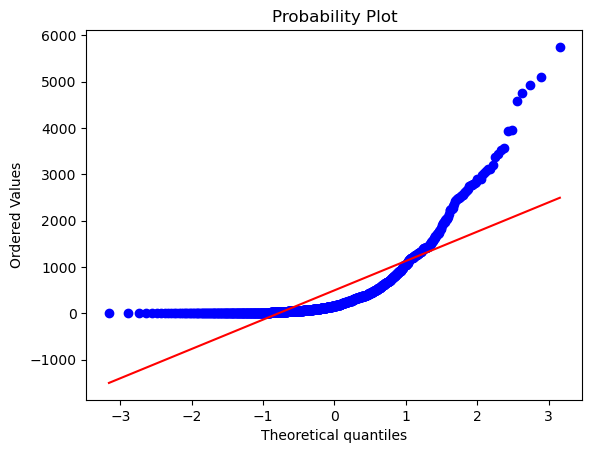

In [7]:
p_value = stats.normaltest(data).pvalue
stats.probplot(data, dist="norm", plot=plt)
alpha = 0.05
if p_value < alpha:
    print(f"not normally distributed (p-value: {p_value})")
else:
    print(f"normally distributed (p-value: {p_value})")

plt.show()

### 第三题代码输出结果正确，也在报告中展现了输出结果有呈现相应的分析.
### 得分15/15
